<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/ml_09_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 30.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=9da3836220f41ee5917804ef1d26f9281812752ae9ce612780f31e663987e302
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# Decision Tree

- 결정 트리(decision tree)는 분류와 회귀 문제에 널리 사용하는 모델 <br>
(분류와 회귀에 모두 사용)

- 분할(Split)와 가지치기 (Pruning) 과정을 통해 생성 <br>
(Tree를 만들기 위해 예/아니오 질문을 반복하며 학습)

- 다양한 앙상블(ensemble) 모델이 존재한다 <br>
     (RandomForest, GradientBoosting, XGBoost)

참고

[트리(Tree)의 개념과 특징을 이해 - 블로그](https://gmlwjd9405.github.io/2018/08/12/data-structure-tree.html)

[트리(그래프) - 나무위키](https://namu.wiki/w/%ED%8A%B8%EB%A6%AC(%EA%B7%B8%EB%9E%98%ED%94%84))

[이진 트리 - 위키백과](https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%A7%84_%ED%8A%B8%EB%A6%AC)

#### 트리(tree) 자료구조

- 노드로 이루어진 자료 구조

- 계층 모델

- 그래프의 한 종류
  - '최소 연결 트리' 라고도 불림
  - 사이클(cycle)이 없는 하나의 연결 그래프(Connected Graph)
  - 또는 DAG(Directed Acyclic Graph, 방향성이 있는 비순환 그래프)의 한 종류

- 예) 파일디렉토리

트리(tree) 자료구조에서의 용어

<center>
 <img src="https://gmlwjd9405.github.io/images/data-structure-tree/tree-terms.png" alt="트리(Tree)용어" width="60%" />

</center>

- 노드(node) : 트리는 노드들의 집합으로 트리를 구성, 보통 (value) 값과 부모 자식의 정보를 가진다.
- 루트 노드(root node): 부모가 없는 노드, 트리는 하나의 루트 노드만을 가진다.
- 단말 노드(leaf node): 자식이 없는 노드, '리프',‘말단 노드’ 또는 ‘잎 노드’라고도 부른다.
- 내부(internal) 노드: 단말 노드가 아닌 노드
- 간선(edge): 노드를 연결하는 선 ('엣지', link, branch 라고도 부름)
- 형제(sibling): 같은 부모를 가지는 노드
- 노드의 크기(size): 자신을 포함한 모든 자손 노드의 개수
- 노드의 깊이(depth): 루트에서 어떤 노드에 도달하기 위해 거쳐야 하는 간선의 수
- 노드의 레벨(level): 트리의 특정 깊이를 가지는 노드의 집합
- 노드의 차수(degree): 하위 트리 개수 / 간선 수 (degree) = 각 노드가 지닌 가지의 수
- 트리의 차수(degree of tree): 트리의 최대 차수
- 트리의 높이(height): 루트 노드에서 가장 깊숙히 있는 노드의 깊이

#### 결정 트리(decision tree)

- 의사결정트리는 학습 데이터로부터 조건식을 만들고 예측할 때는 트리의 루트 노드(root node) 부터 순서대로 조건 분기를 타면서 리프 노드(leaf node)에 도달하면 예측 결과를 내는 알고리즘

- 학습 결과로 IF-THEN 형태의 규칙을 생성 (Split)

- 타깃 값이 한 개인 리프 노드를 순수 노드라고 한다. 

- 모든 노드가 순수 노드가 될 때 까지 학습하면 모델이 복잡해지고 훈련 데이터에 과대적합이 된다.

- 새로운 데이터 포인트가 들어오면 해당하는 노드를 찾고, 분류라면 더 많은 클래스를 선택, 회귀라면 평균을 구한다.


특징

- 학습한 모델을 사람이 해석하기 쉽다 -> 시각화 가능
- 입력 데이터에 대한 정규화가 필요 없다
- 범주형 변수나 데이터의 누락값이 있어도 용인된다
- 특정 조건이 맞으면 과적합을 일으키는 경향이 있다
 - 트리가 깊어질 수록 데이터 수가 적어짐
 - 가지치기(pruning)로 깊이를 줄여서 방지
- 비선형 문제에는 우수하지만 선형 분리 문제는 잘 풀지 못한다
- 데이터 분포가 특정 클래스에 쏠려 있으면 잘 풀지 못한다
- 데이터의 작은 변화에도 결과가 크게 바뀌기 쉽다
- 예측 성능은 보통이다
- 배치 학습만 학습할 수 있다.


종류

- 의사 결정 포레스트, 향상된 의사결정 트리, Random Forest, Rotation Forest 등


결정트리(Decision Tree) 과대적합 제어

- 노드 생성을 미리 중단하는 사전가지치기(pre-pruning)와 트리를 만든후에 크기가 작은 노드를 삭제하는 사후가지치기(pruning)가 있다. <br>
    (sklearn은 사전가지치기만 지원)

가지치기(pruning)
- 하나의 가지 (branch)에 동일한 예측 값이 나오는 경우
 - 의사결정트리는 동일 조건에서 가장 간단한 구조여야 한다.

사전가지치기(pre-pruning)

- 트리의 최대 깊이나 리프노드의 최대 개수를 제어

- 노드가 분할하기 위한 데이터 포인트의 최소 개수를 지정


장단점

- 만들어진 모델을 쉽게 시각화할 수 있어 이해하기 쉽다. <br>
    (white box model)

- 각 특성이 개별 처리되기 때문에 데이터 스케일에 영향을 받지 않아 특성의 정규화나 표준화가 필요 없다.

- 훈련데이터 범위 밖의 포인트는 예측 할 수 없다. <br>
    (ex : 시계열 데이터)

- 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않다.


[DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

```
DecisionTreeClassifier(criterion, splitter, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, random_state, max_leaf_nodes, min_impurity_decrease, min_impurity_split, class_weight, presort)
```
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- <font  color=yellow> max_depth : 트리의 최대 깊이 <br>
(값이 클수록 모델의 복잡도가 올라간다.) </font>
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- <font  color=yellow> min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1) </font>
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- <font  color=yellow> max_leaf_nodes : 리프 노드의 최대수 </font>
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- class_weight : 클래스 가중치
- presort : 데이터 정렬 필요 여부


In [ ]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

#### Decision Tree 실습 01

붓꽃 데이터 결정트리 만들기

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=42)

# 모델 학습
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9583333333333334, 1.0)

**Graphviz 설치(Windows)**

1. 아래 링크로 들어가서 graphviz-2.38-win32.msi 다운로드 후 설치

> https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/

2. 시스템 환경변수 PATH 에 다음 경로 추가

> C:\Program Files (x86)\Graphviz2.38\bin

```
# 파이썬 래퍼(Wrapper) 모듈을 별도로 설치
# !pip install graphviz
```

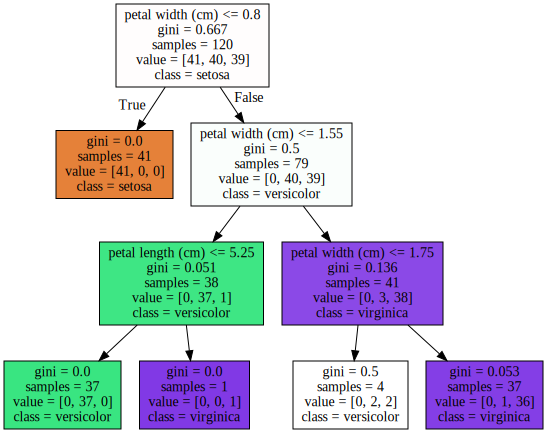

In [ ]:
# 결정트리 규칙을 시각화
from sklearn.tree import export_graphviz
import graphviz

# export_graphviz() 를 호출하여 out_file 파라메터의 "tree.dot" 파일을 생성
export_graphviz(model, out_file='tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

# "tree.dot" 파일을 graphviz 가 읽어서 주피터 노트북에 시각화
with open('tree.dot') as f:
  dot_graph = f.read()

display( graphviz.Source(dot_graph) )

- 각 규칙에 따라 트리의 브랜치(branch) 노드와 말단 리프(leaf) 노드가 어떻게 구성되는지 시각화

- 트리를 조사할 때 많은 수의 데이터가 흐르는 경로를 찾는 것이 중요

트리 시각화 장점
- 알고리즘의 예측이 어떻게 이뤄지는지 이해가 가능
- 비전문가에게 머신러닝 알고리즘을 설명하기에 좋음

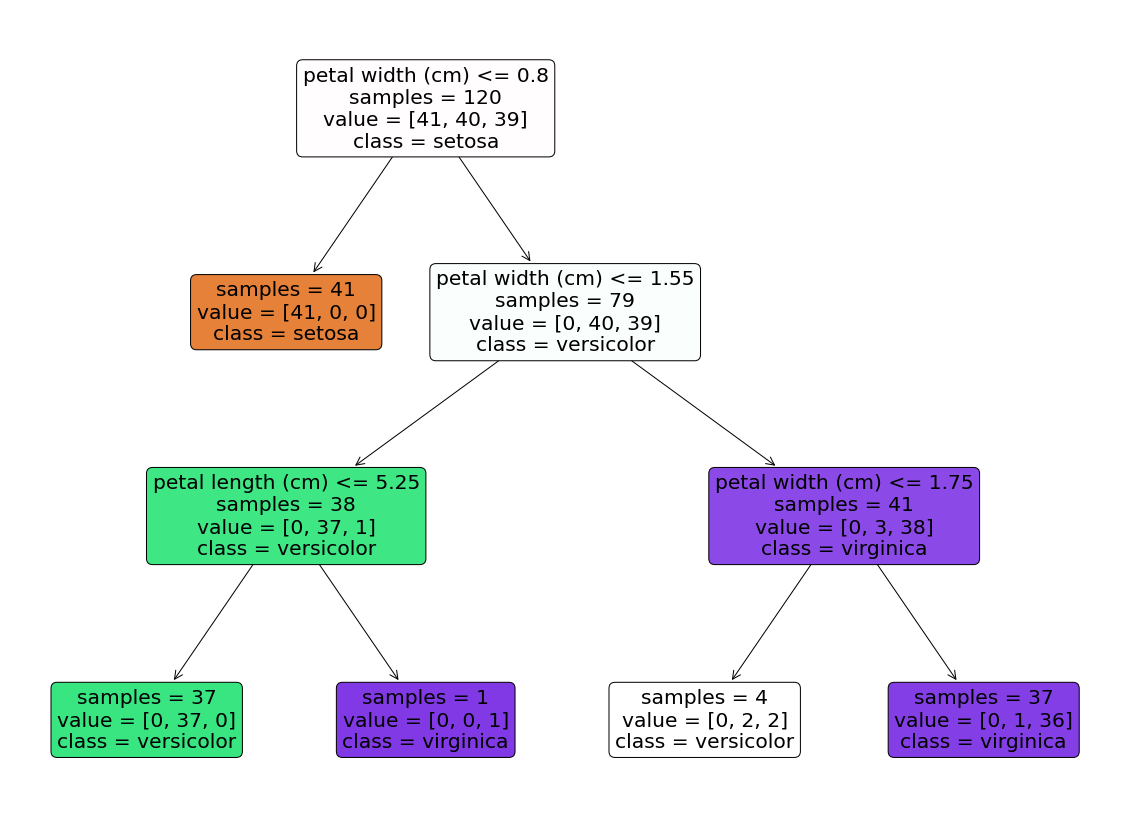

In [ ]:
# 사이킷런 0.21 버전 이후 맷플롯립 기반 트리 그래프 시각화 함수 추가
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure( figsize=(20, 15) )
tree.plot_tree(model, 
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               filled=True, impurity=False,
               rounded=True)
plt.show()

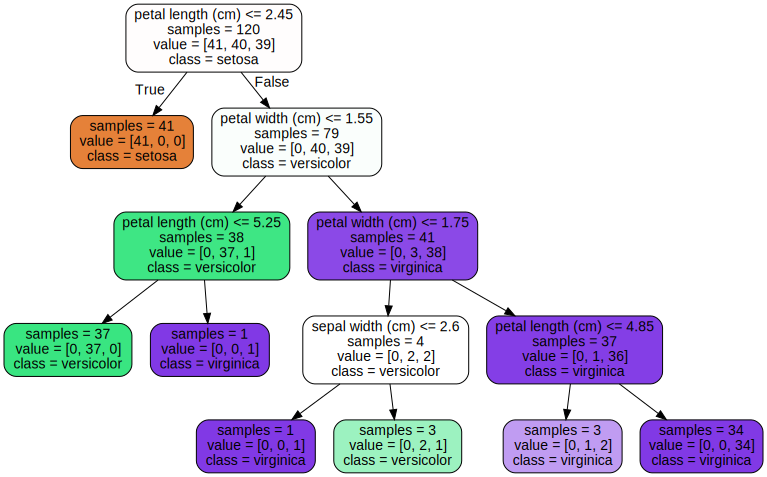

In [ ]:
# min_samples_split
# 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
# 모델학습
model = DecisionTreeClassifier(min_samples_split=4).fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

# 결정트리 규칙 시각화
export_graphviz(model, out_file='tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True, rounded=True, impurity=False)

# "tree.dot" 파일을 graphviz 가 읽어서 주피터 노트북에 시각화
with open('tree.dot') as f:
  dot_graph = f.read()

display( graphviz.Source(dot_graph) )

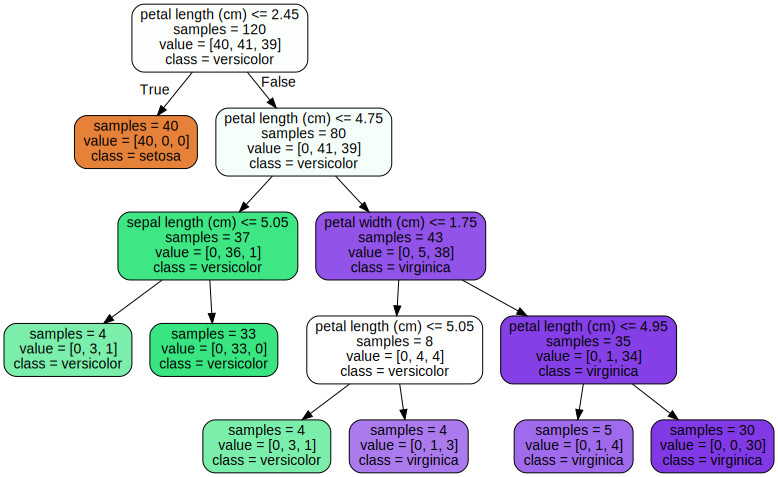

In [ ]:
# min_samples_leaf
# 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값
# 모델학습
model = DecisionTreeClassifier(min_samples_leaf=4).fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

# 결정트리 규칙 시각화
export_graphviz(model, out_file='tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True, rounded=True, impurity=False)

# "tree.dot" 파일을 graphviz 가 읽어서 주피터 노트북에 시각화
with open('tree.dot') as f:
  dot_graph = f.read()

display( graphviz.Source(dot_graph) )

##### 트리 특성 중요도

- 특성 중요도(feature importance) : 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가

- 이 값은 0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻
- 특성 중요도의 전체 합은 1

feature_importances_

- 중요한 몇 개의 특성(feature)이 명확한 트리를 만드는 데 크게 기여 </br>
(모델을 좀 더 간결하고 이상치(Outlier)에 강한 모델을 만들 수 있기 때문)
- 결정트리가 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 feature_importances_ 로 제공

트리 특성 중요도: [0.006 0.    0.955 0.039]


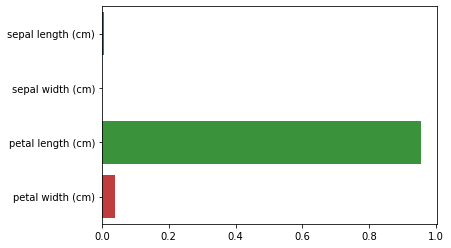

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print('트리 특성 중요도:', np.round(model.feature_importances_, 3) )

# feature별 importance 매핑
# feature importance를 column 별로 시각화 하기 
sns.barplot(x=model.feature_importances_, y=iris.feature_names)
plt.show()

#### Decision Tree 실습 02

two_moon 데이터 결정트리 만들기

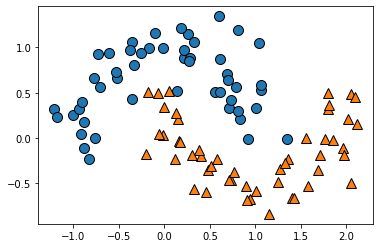

In [ ]:
import mglearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)

# 훈련/테스트 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 데이터 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [ ]:
# 모델 생성과 학습
from sklearn.tree import DecisionTreeClassifier

# max_depth를 주지 않으면 과대적합 가능성 높음
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9333333333333333, 0.88)

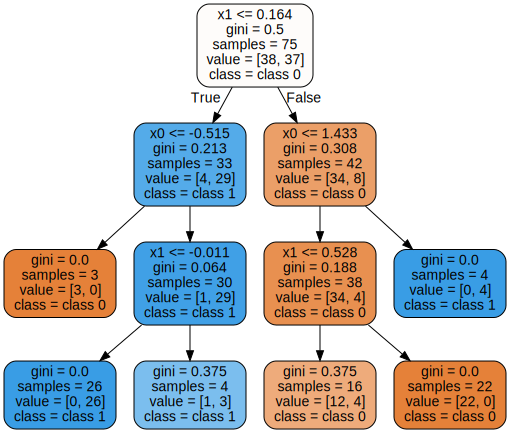

In [ ]:
# 결정트리 규칙을 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file='tree.dot',
                class_names=['class 0', 'class 1'],
                feature_names=['x0', 'x1'],
                filled=True, rounded=True, impurity=True)
with open('tree.dot') as f:
  dot_graph = f.read()
display( graphviz.Source(dot_graph) )

array([0.363, 0.637])

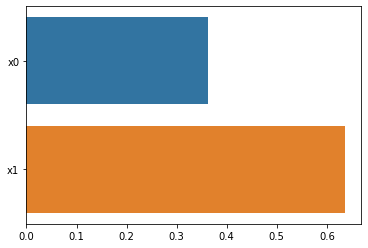

In [ ]:
# 트리 특성 중요도
# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=['x0', 'x1'] )
np.round(model.feature_importances_, 3)

#### 분류 결과 시각화

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def plot_decision_boundary(model, X, y):
    padding=0.15
    res=0.01
    
    # 데이터 세트의 x, y의 최대 값과 최소값
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    
    # x와 y의 범위
    x_range = x_max - x_min
    y_range = y_max - y_min
    
    # 범위에 패딩 추가
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # 위의 포인트 범위로 메쉬그리드를 생성
    xx,yy = np.meshgrid( np.arange(x_min,x_max,res), np.arange(y_min,y_max,res) )
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    # 모델을 사용하여 그리드 라벨의 각 지점에서 클래스를 예측하여 2D 배열을 벡터로 변환
    # c_ concatenates 예측을 수행 할 하나의 긴 벡터를 만듭니다.
    # 마지막으로 예측 벡터는 원래 데이터 형태로 재구성됩니다.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    # contourf() 를 이용하여 그리드에 class boundary를 시각화
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    
    # 원래 데이터와 레이블을 시각화
    plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)

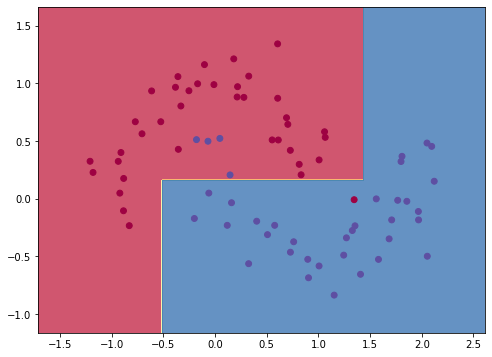

In [ ]:
# 분류 결과 시각화
# mglearn.plots.plot_tree_partition(X_train, y_train, model)
plot_decision_boundary(model, X_train, y_train)
plt.show()

- 결정경계 : 영역을 반복해서 나눠가는 과정에서 정해지기 때문에 직선 형태를 취하지 않음
 - 선형 분리가 불가능한 문제에 유리

- 불순도 (impurity)를 기준으로 가능한 같은 클래스끼리 모이도록 조건 분기 학습
 - 엔트로피(Entropy), 지니계수(Gini coefficient)

#### 의사결정 트리 과정

- 불순도로 Gini 지수를 사용한 경우

 - 지니 불순도

 > ${ G }_{ i }= 1-\sum\limits _{ k=1 }^{ n }{ { p }_{ i,k }^{ 2 }  }  $
 
 > [10, 6] 의 GI :$ G(A)=1-{ (\frac { 10 }{ 16 } ) }^{ 2 } - { (\frac { 6 }{ 16 } ) }^{ 2 }\approx  0.47 $






 - 의사결정나무는 구분 뒤 각 영역의 순도가 증가/불확실성이 최대한 감소하도록 학습

 > \\( GI=\sum\limits _{ i=1 }^{ d }{ { (R }_{ i }(1-\sum\limits _{ k=1 }^{ m }{ { p }_{ ik }^{ 2 })) }  }  \\)

 - \\( { p }_{ k } \\)
: 분리된 집단에서 k집단이 속한 비율,
 - \\( { R }_{ i } \\)
: 전체집단에서 분리된 집단의 비율


○의 GI (적색선으로 분리한 후) : \\( G(A)=0.5 \times (1-{ (\frac { 7 }{ 8 } ) }^{ 2 }-{ (\frac { 1 }{ 8 } ) }^{ 2 } )  + 0.5 \times (1-{ (\frac { 5 }{ 8 } ) }^{ 2 }-{ (\frac { 3 }{ 8 } ) }^{ 2 } ) \approx 0.34 \\)

#### 결정트리 과적합(Overfitting)


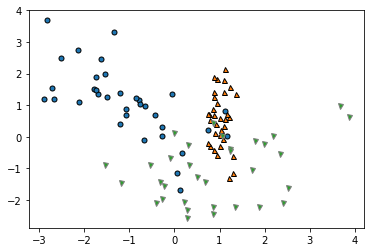

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

# 2차원 시각화를 위해서 feature는 2개, 
# 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X, y = make_classification(n_features=2, n_redundant=0,
                           n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화
# 각 클래스값은 다른 색깔로 표시
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=5)
plt.show()

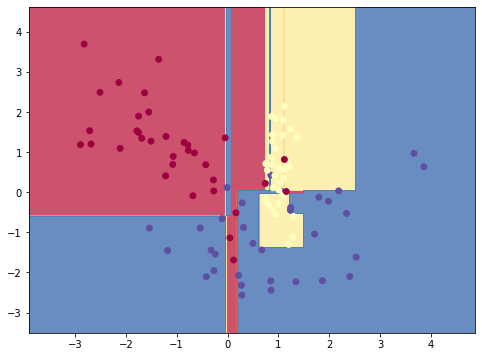

In [ ]:
# 결정기준 경계를 시각화
# 결정트리 생성에 별다른 제약이 없도록 하이퍼 파라미터를 디폴트로 생성
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화
model = DecisionTreeClassifier().fit(X, y)
plot_decision_boundary(model, X, y)

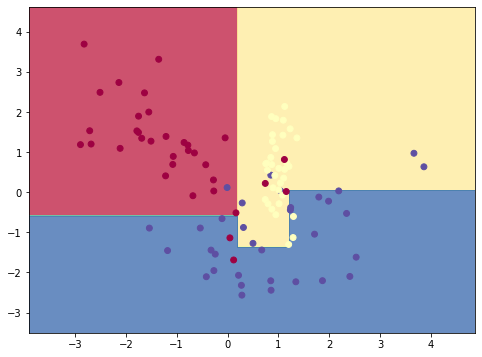

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
# 6개 이하의 데이터는 리프 노드를 생성할 수 없도록 리프 노드 생성 규칙을 완화
model = DecisionTreeClassifier(min_samples_leaf=6, random_state=0).fit(X, y)
plot_decision_boundary(model, X, y)

#### Decision Tree 실습 03

유방암 데이터에 결정트리 적용 및 사전 가지치기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# stratify : 지정한 Data의 비율을 유지
# 예를 들어, Label Set인 y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, 
# stratify=y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한채 분할된다.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)

In [ ]:
cancer.target_names
cancer.feature_names
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
# 모델학습
# 모든 리프 노드가 순수노드이면 훈련 세트 정확도는 100%
model = DecisionTreeClassifier().fit(X_train, y_train)
# 정확도
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.9370629370629371)

- 트리의 깊이를 제한하면 과대적합이 줄어듦
- 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 개선

In [ ]:
# 사전가지치기
# 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막음
# 1) max_depth=4 : 연속된 질문을 최대 (4)개로 제한
model = DecisionTreeClassifier(min_samples_leaf=12, random_state=0)
model.fit(X_train, y_train)
# 정확도
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9624413145539906, 0.951048951048951)

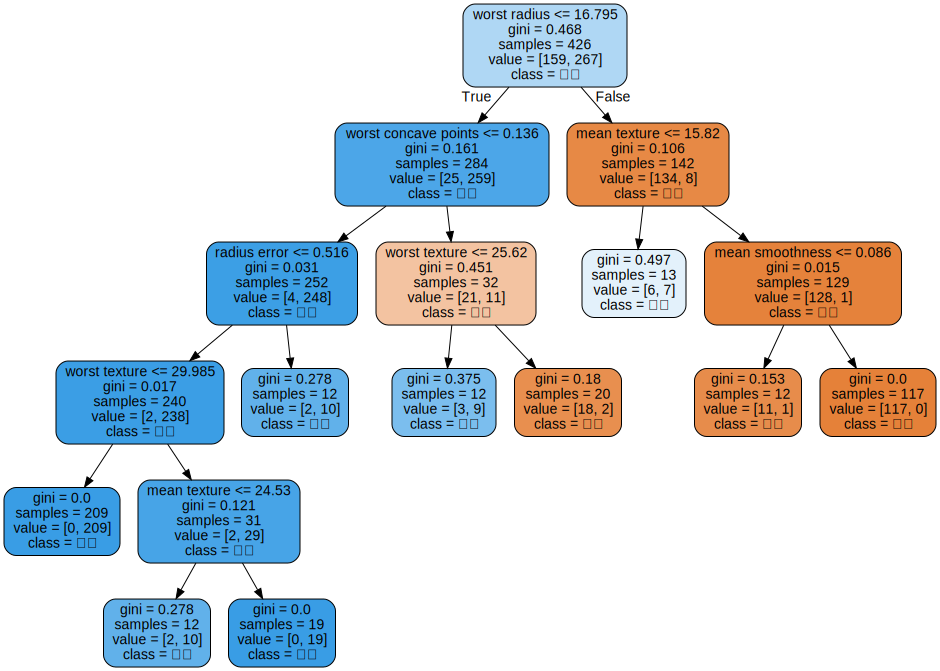

In [ ]:
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file='tree.dot',
                class_names=['악성', '양성'],
                feature_names=cancer.feature_names,
                filled=True, rounded=True, impurity=True)
with open('tree.dot') as f:
  dot_graph = f.read()
display( graphviz.Source(dot_graph) )

array([0.        , 0.0400637 , 0.        , 0.        , 0.00085767,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00325118, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.78646239, 0.03723287, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13213218, 0.        , 0.        ])

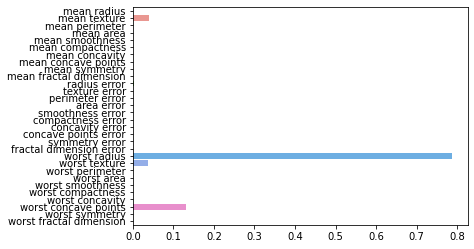

In [ ]:
# 특성 중요도 시각화
# feature importance를 column 별로 시각화 하기 
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)
model.feature_importances_

- 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아님

- 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있음

#### Decision Tree 실습 04

타이타닉 데이터 사용

In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

##### 데이터 준비

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_excel(drive_path + 'titanic.xls')

##### 데이터 분석 (시각화, EDA - 탐색적 데이터분석)

- 데이터를 세부적으로 살펴보는 것 <br> 
  (결측치, 이상치, 데이터분포, 라벨의 분포, 범주형 데이터의 종류 등 확인)
- 데이터를 시각화
- 데이터를 어떻게 수정할 것인지 결정

In [ ]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


- pclass : 객실 등급
- survived : 생존 유무
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- fare : 지불한 운임
- boat : 탈출한 보트가 있다면 boat 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [ ]:
# 이상치 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


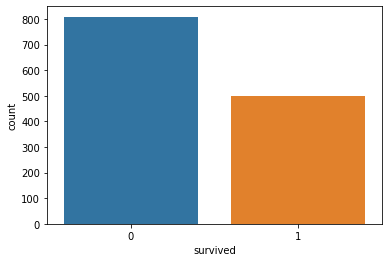

In [ ]:
# 생존자 수 확인
import seaborn as sns

# countplot: 범주형 변수의 빈도수를 시각화
sns.countplot('survived', data=df)

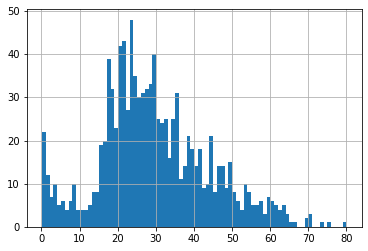

In [ ]:
# 나이순으로 숫자 보기
df['age'].hist(bins=80)

In [ ]:
# 선실 등급별 상황
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


**heatmap**

- Target Feature와 나머지 독립변수들의 상관계수를 직관적으로 확인
- 데이터.corr() : heatmap에 사용할 데이터의 상관계수

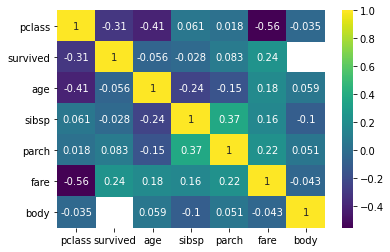

In [ ]:
# 특성의 상관관계 분석
sns.heatmap(df.corr(), cmap=plt.cm.viridis, annot=True)

- 생존률과의 관계?


In [ ]:
# 객실 등급(pclass)별, 연령대별, 성별 비교

# seaborn은 barplot() 함수를 사용할 때 
# 각 막대에 기본적으로 오차막대(error bar)가 함께 나타나도록 되어 있다.
# 오차막대를 그리는 범위는 기본적으로 
# “이 데이터를 기반으로 유사한 상황의 95%가 이 범위 내에서 결과를 얻을 것”을 의미한다.
x = df['age']
bins = [0, 10, 20, 50, 100]
labels = ['baby', 'teenage', 'adult', 'old']
df['age_cut'] = pd.cut(x=x, bins=bins, labels=labels)

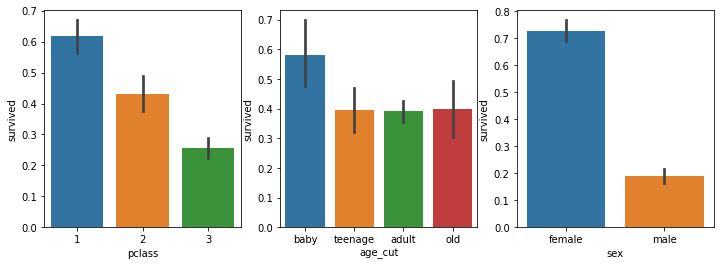

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4) )
sns.barplot('pclass', 'survived', data=df, ax=axes[0])
sns.barplot('age_cut', 'survived', data=df, ax=axes[1])
sns.barplot('sex', 'survived', data=df, ax=axes[2])

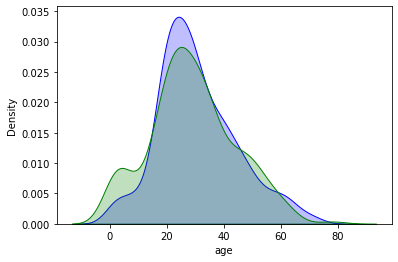

In [ ]:
# 연령대별 생존여부 분포 비교
# 커널밀도추정 KDE ; 데이터의 분포를 확인
# df['age'][ df['survived'] == 0 ][ df['age'].notnull() ]
survived_0 = df['age'][ (df['survived'] == 0) & (df['age'].notnull()) ]
survived_1 = df['age'][ (df['survived'] == 1) & (df['age'].notnull()) ]
sns.kdeplot(survived_0, shade=True, color='b')
sns.kdeplot(survived_1, shade=True, color='g')

- 성별 생존자수 비교 결과?


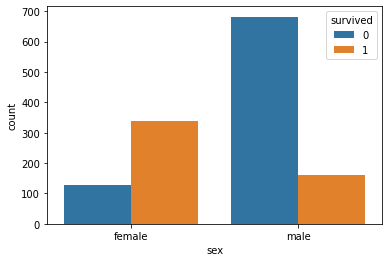

In [ ]:
# 성별 생존자수 비교
# sns.countplot('sex', data=df)
sns.countplot('sex', hue='survived', data=df)

- 구조 보트에 탑승하고도 사망한 비율 ??%


1    477
0      9
Name: survived, dtype: int64

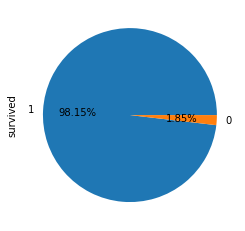

In [ ]:
# 구조 보트에 탑승하고도 사망한 비율
boat_df = df[ df['boat'].notnull() ]
# sns.countplot('survived', data=boat_df)
boat_df['survived'].value_counts().plot.pie(autopct='%1.2f%%')
boat_df['survived'].value_counts()

##### 데이터 전처리

In [ ]:
df = pd.read_excel(drive_path + 'titanic.xls')

In [ ]:
df['embarked'].value_counts()
pd.get_dummies(df['embarked'])
pd.get_dummies(df['sex'])['female']
df.loc[ df['sex'] == 'male', 'sex' ]
df.loc[ df['sex'] == 'female', 'sex' ]

df['fare'].mean()
df.groupby('pclass')['fare'].mean()[2]
df.loc[ pd.isnull( df['fare'] ), 'fare' ]

1225   NaN
Name: fare, dtype: float64

In [ ]:
# - embarked : 탑승장소별 컬럼 추가
# S=Southhampton, C=Cherbourg, Q=Queenstown
df['embarked_c'] = df['embarked'] == 'C'
df['embarked_s'] = df['embarked'] == 'S'
df['embarked_q'] = df['embarked'] == 'Q'

# 데이터에서 여성을 1로 남성을 0으로 설정
df.loc[ df['sex'] == 'male', 'sex' ] = 0
df.loc[ df['sex'] == 'female', 'sex' ] = 1

# 결측치 채움
# fare : 지불한 운임
mean_fare3 = df.groupby('pclass')['fare'].mean()[2]
df.loc[ pd.isnull( df['fare'] ), 'fare' ] = mean_fare3

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   sex         1309 non-null   object 
 4   age         1046 non-null   float64
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1309 non-null   float64
 9   cabin       295 non-null    object 
 10  embarked    1307 non-null   object 
 11  boat        486 non-null    object 
 12  body        121 non-null    float64
 13  home.dest   745 non-null    object 
 14  embarked_c  1309 non-null   bool   
 15  embarked_s  1309 non-null   bool   
 16  embarked_q  1309 non-null   bool   
dtypes: bool(3), float64(3), int64(4), object(7)
memory usage: 147.1+ KB


In [ ]:
# Feature 선택
# X = 객실 클래스, 성별, 요금, 선착장 3개, 총 6요소


In [ ]:
# 정답셋 준비
# y = "survived"


#### Decision Tree 실습 05

결정트리로 타이타닉 생존자 예측

In [ ]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=13)

In [ ]:
# 결정트리 적용
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# 트리 구조 시각화하기
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz


In [ ]:
# 정확도 예측하기 (accuracy_score)
from sklearn.metrics import accuracy_score


In [ ]:
# 실제 데이터를 넣어서 예측하기
# pclass, sex, age, sibsp, parch, fare
# dicaprio = [3., 0., 19., 0., 0., 5.]
# winslet  = [1., 1., 17., 1., 2., 100.]
dicaprio = [3., 0., 19., True, False, False]
winslet  = [1., 1., 17., False, False, True]


## 결정 트리 회귀

- 분류 결정 트리와 비슷
- 각 노드에서 클래스를 예측하는 대신 어떤 값을 예측
- 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없음
 - (다른 모든 트리기반 회귀 모델도 동일)

[DecisionTreeRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

```
DecisionTreeRegressor(criterion, splitter, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, random_state, max_leaf_nodes, min_impurity_decrease, min_impurity_split, presort, ccp_alpha)
```
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- <font  color=yellow> max_depth : 트리의 최대 깊이 <br>
(값이 클수록 모델의 복잡도가 올라간다.) </font>
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- <font  color=yellow> min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1) </font>
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- <font  color=yellow> max_leaf_nodes : 리프 노드의 최대수 </font>
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- presort : 데이터 정렬 필요 여부 (버전 0.22부터 사용되지 않음)
- ccp_alpha : 최소 비용 복잡성 가지 치기(Minimal Cost-Complexity Pruning) 복잡성 매개변수, 음이아닌 float (버전 0.22의 새로운 기능)


In [ ]:
import numpy as np
import pandas as pd
import os
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

# 로그 스케일로 그린 램 가격 동향


- y 축은 로그 스케일
- 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 비교적 예측하기 쉬움

In [ ]:
# 결정트리 회귀 적용
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듬

# 가격 예측을 위해 날짜 특성만을 이용

# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일로 변경.

# 예측은 전체 기간에 대해서 수행합니다.

# 예측한 값의 로그 스케일 되돌림

In [ ]:
# 결과 시각화


In [ ]:
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz


- 선형 모델은 우리가 아는 대로 직선으로 데이터를 근사
- 이 직선은 훈련 데이터와 테스트 데이터에 있는 미세한 굴곡을 매끈하게 근사하여 테스트 데이터(2000년 이후)를 꽤 정확히 예측
- 반면에 트리 모델은 훈련 데이터를 완벽하게 예측
- 트리의 복잡도에 제한을 두지 않아서 전체 데이터셋을 모두 기억하기 때문
- 그러나 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 예측하는 게 전부
- 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없음


-  사전 가지치기 방법 중 max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분

- 다른 알고리즘들보다 나은 점 : 만들어진 모델을 쉽게 시각화할 수 있음, 데이터의 스케일에 구애받지 않음 (스케일링이 필요 없음)

- 주요 단점 : 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않음